In [1]:
# uplode a file
import pandas as pd
data = pd.read_excel("Maintenance.xlsx")
data


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


# **EDA Process**

Describing the dataset


In [2]:
# dropping all unnecessary columns from data set
# UDI and Product ID are having unique values so it not usful for model building
data.drop(columns=['UDI','Product ID'],inplace= True)

In [ ]:
data.shape

(10000, 12)

In [ ]:
# Overview of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   TWF                      10000 non-null  int64  
 8   HDF                      10000 non-null  int64  
 9   PWF                      10000 non-null  int64  
 10  OSF                      10000 non-null  int64  
 11  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB


In [ ]:
# summary of dataset
data.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


unique values


In [ ]:
data.nunique()

Type                         3
Air temperature [K]         93
Process temperature [K]     82
Rotational speed [rpm]     941
Torque [Nm]                577
Tool wear [min]            246
Machine failure              2
TWF                          2
HDF                          2
PWF                          2
OSF                          2
RNF                          2
dtype: int64

Cleaning the data



In [ ]:
data.dtypes

Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [ ]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
data.tail()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


In [ ]:
original_data=data.copy()

Label Encoding

In [ ]:
set(data['Type'])

{'H', 'L', 'M'}

In [3]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Type']= label_encoder.fit_transform(data['Type'])
data
# H = 0
# M = 2
# L = 1

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,0,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,2,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,0,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [ ]:
data['Type']

0       2
1       1
2       1
3       1
4       1
       ..
9995    2
9996    0
9997    2
9998    0
9999    2
Name: Type, Length: 10000, dtype: int32

In [ ]:
# check for the missing values
data.isnull().sum()


Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [ ]:
# check for the  duplicates
data[data.duplicated()].sum()

Type                       0.0
Air temperature [K]        0.0
Process temperature [K]    0.0
Rotational speed [rpm]     0.0
Torque [Nm]                0.0
Tool wear [min]            0.0
Machine failure            0.0
TWF                        0.0
HDF                        0.0
PWF                        0.0
OSF                        0.0
RNF                        0.0
dtype: float64

In [ ]:
data

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,0,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,2,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,0,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


**Detecting Outliers**


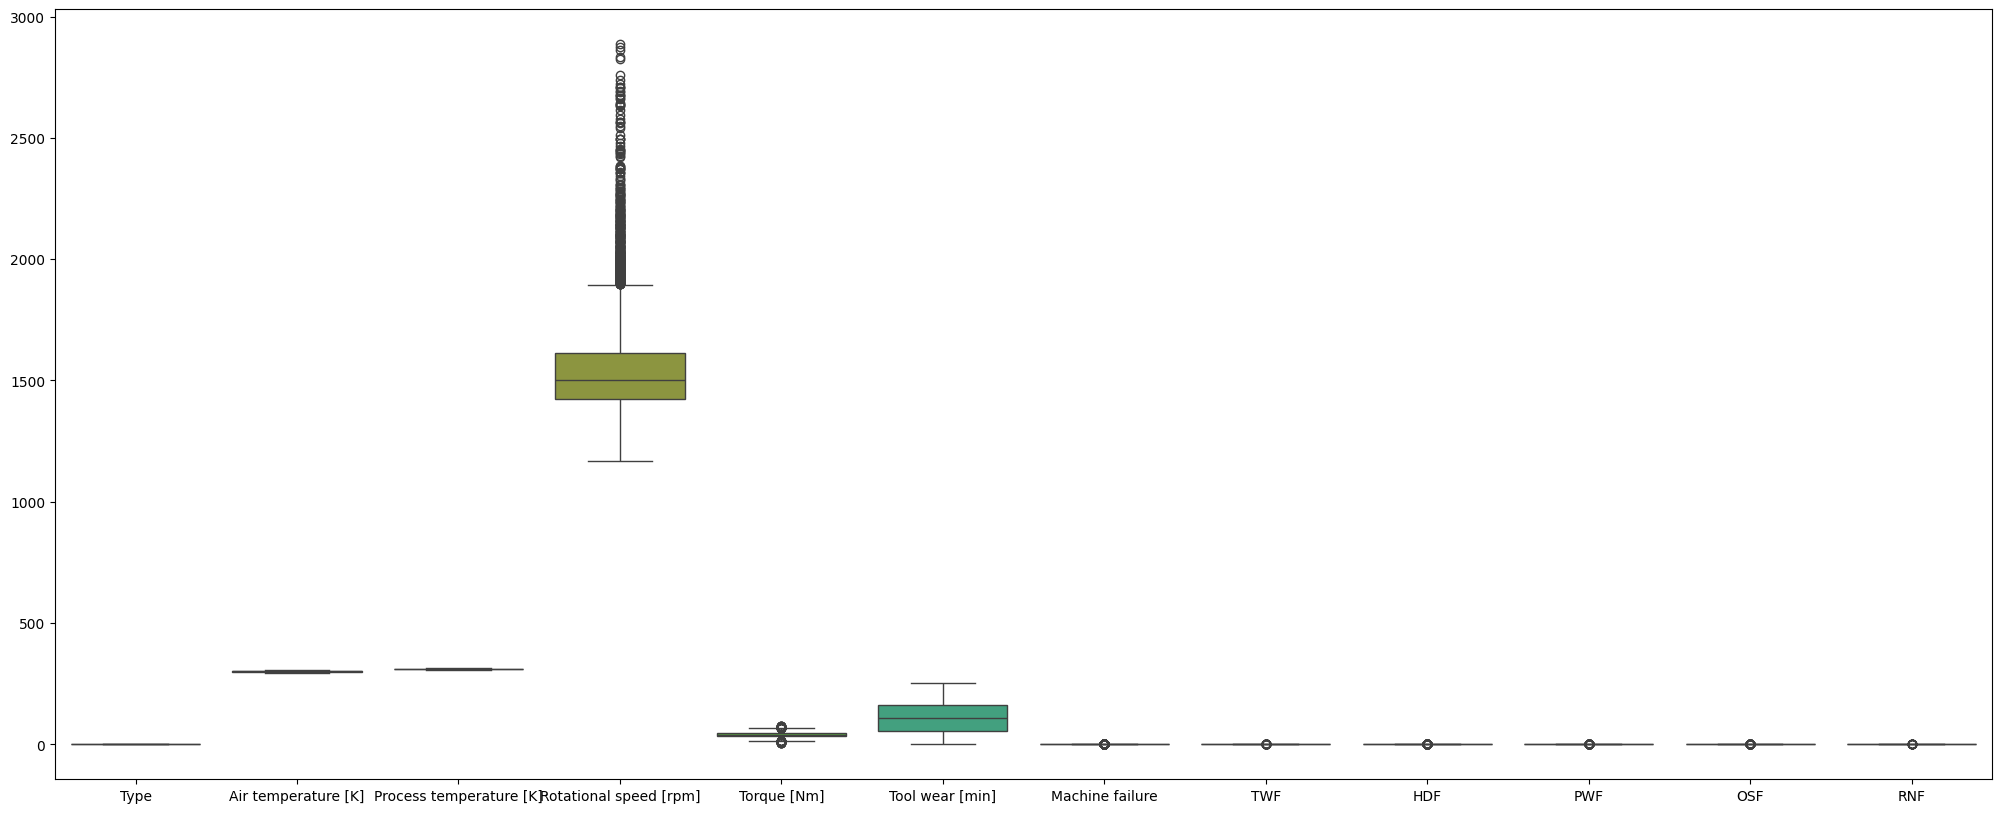

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25,10))
sns.boxplot(data=data)
plt.show()

Finding Outlier in rotational speed[rpm] and Torque[Nm]


## Handling outliers

In [7]:
Q1 = data['Rotational speed [rpm]'].quantile(0.25)
Q3 = data['Rotational speed [rpm]'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Replace outliers with nearest bound
data['Rotational speed [rpm]'] = data['Rotational speed [rpm]'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)


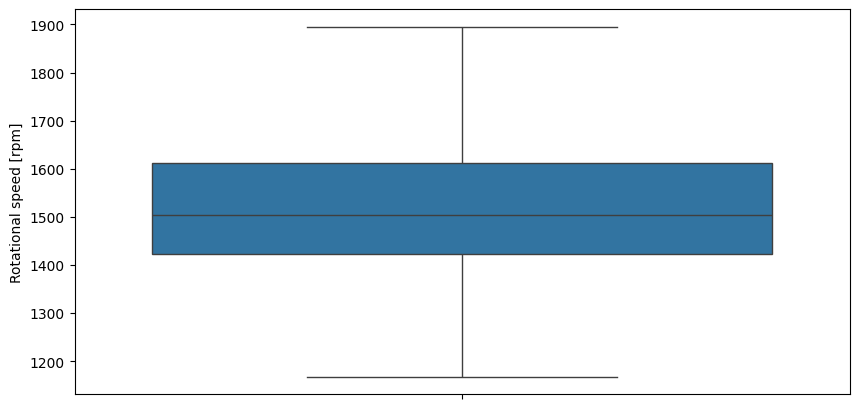

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(y="Rotational speed [rpm]",data=data)
plt.show()

In [9]:
Q1 = data['Torque [Nm]'].quantile(0.25)
Q3 = data['Torque [Nm]'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data['Torque [Nm]'] = data['Torque [Nm]'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)


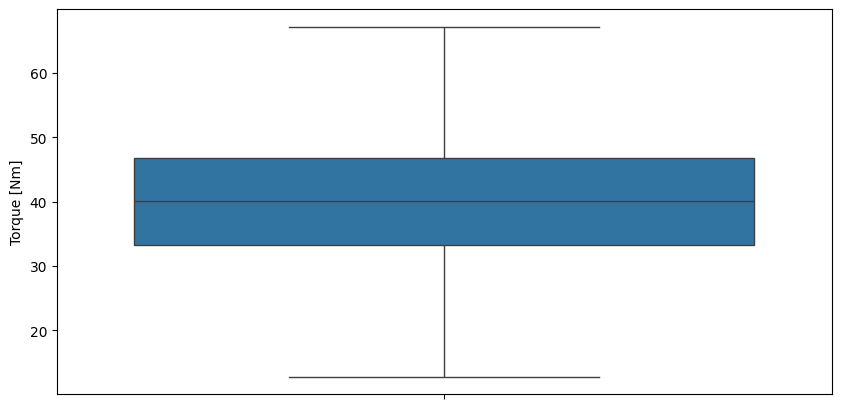

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(y="Torque [Nm]",data=data)
plt.show()

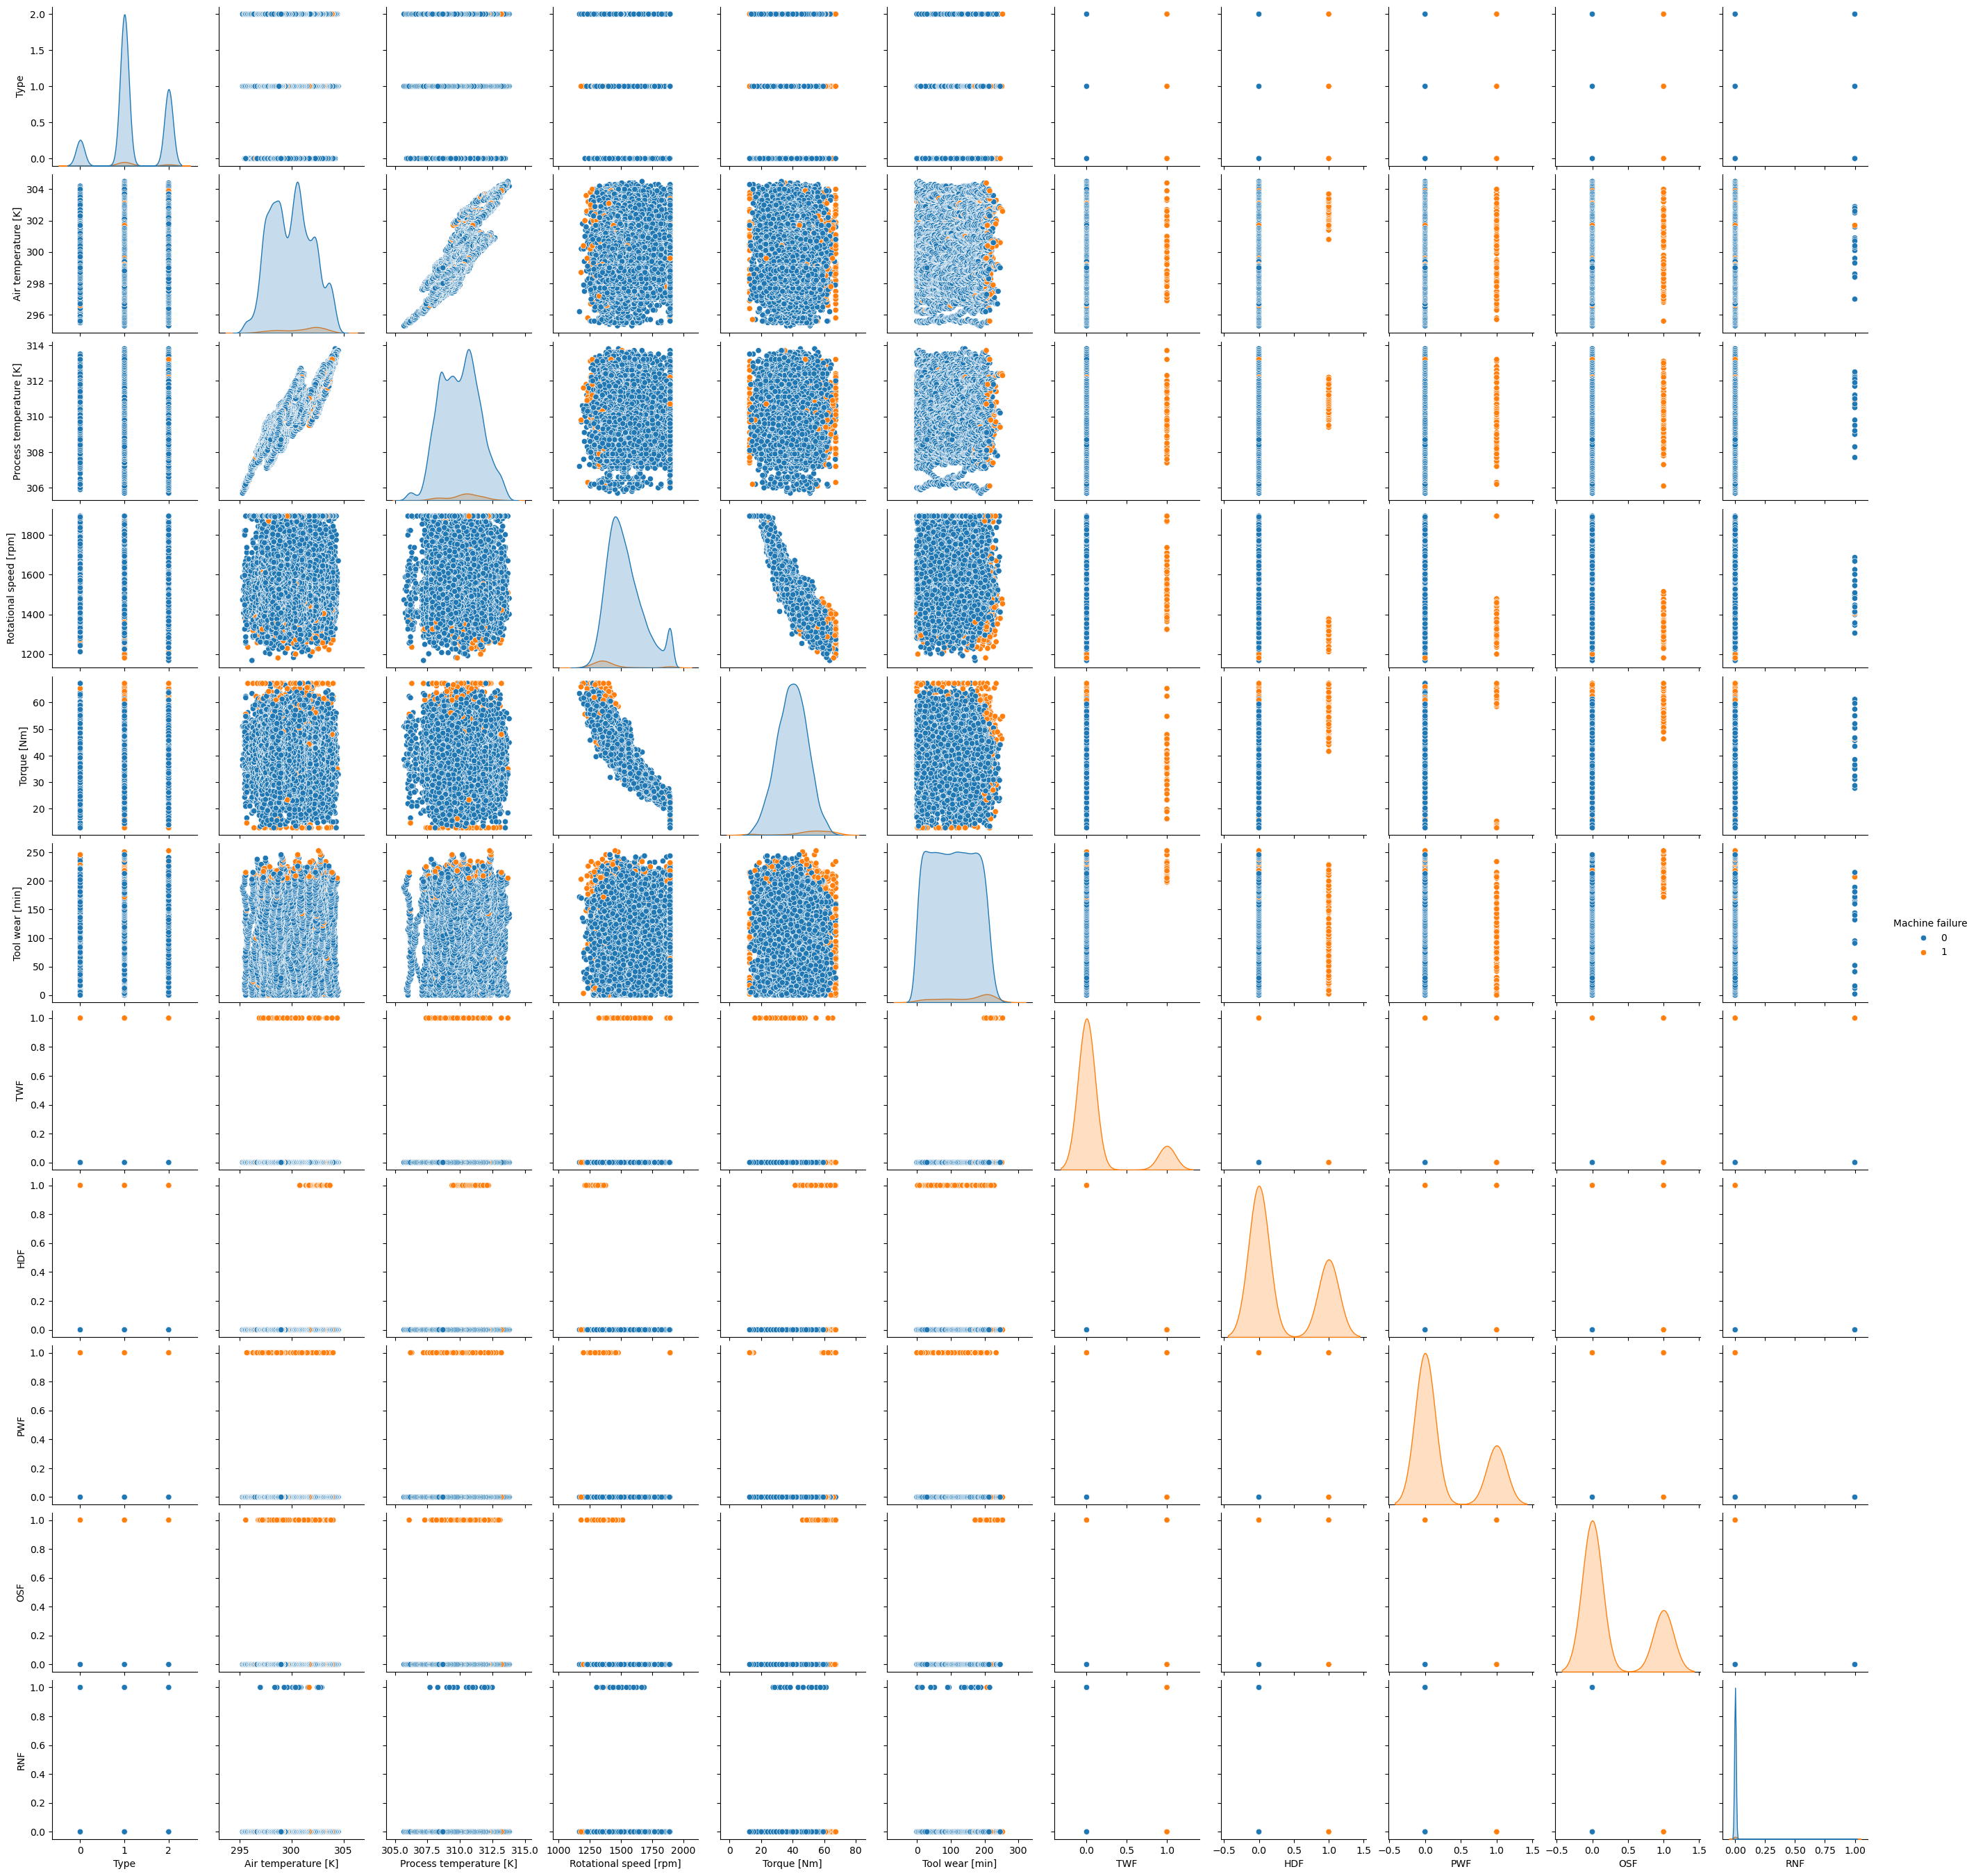

In [ ]:
import seaborn as sns
sns.pairplot(data, hue='Machine failure')

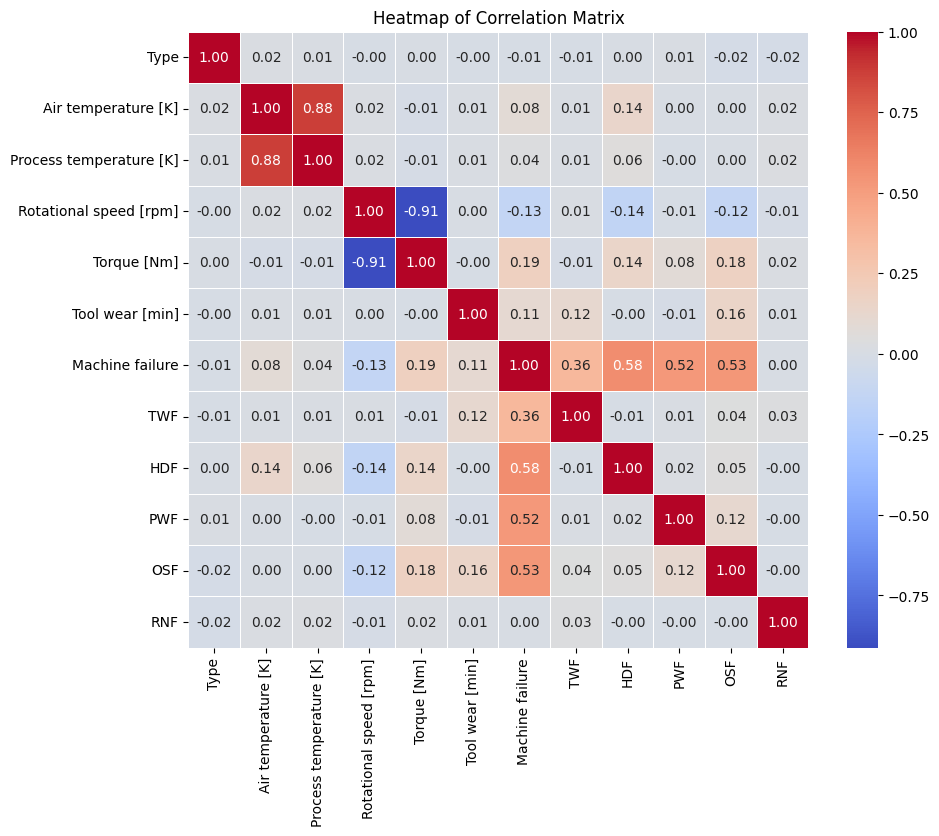

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Show the plot
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [ ]:
data

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,2,298.1,308.6,1551.0,42.8,0,0,0,0,0,0,0
1,1,298.2,308.7,1408.0,46.3,3,0,0,0,0,0,0
2,1,298.1,308.5,1498.0,49.4,5,0,0,0,0,0,0
3,1,298.2,308.6,1433.0,39.5,7,0,0,0,0,0,0
4,1,298.2,308.7,1408.0,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604.0,29.5,14,0,0,0,0,0,0
9996,0,298.9,308.4,1632.0,31.8,17,0,0,0,0,0,0
9997,2,299.0,308.6,1645.0,33.4,22,0,0,0,0,0,0
9998,0,299.0,308.7,1408.0,48.5,25,0,0,0,0,0,0


# Feature Engineering

In [12]:
# Drop unnecessary columns and preprocess the data
features = data.drop(columns=[ "Machine failure"])
target = data["Machine failure"]


In [13]:
# scalling
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [15]:
features =pd.DataFrame(X_scaled,columns=features.columns)
features

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,1.333889,-0.952389,-0.947360,0.140180,0.284091,-1.695984,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
1,-0.332223,-0.902393,-0.879959,-0.820899,0.637122,-1.648852,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
2,-0.332223,-0.952389,-1.014761,-0.216024,0.949807,-1.617430,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
3,-0.332223,-0.902393,-0.947360,-0.652879,-0.048768,-1.586009,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
4,-0.332223,-0.902393,-0.879959,-0.820899,0.001665,-1.554588,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.333889,-0.602417,-1.082162,0.496384,-1.057429,-1.476034,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
9996,-1.998335,-0.552421,-1.082162,0.684567,-0.825437,-1.428902,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
9997,1.333889,-0.502425,-0.947360,0.771938,-0.664051,-1.350349,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
9998,-1.998335,-0.502425,-0.879959,-0.820899,0.859028,-1.303217,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363


# MODEL BUILDING

In [16]:
 # Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [17]:
# Initialize models
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Neural Network": MLPClassifier(max_iter=1000, random_state=42),
    "decisionTree ": DecisionTreeClassifier(criterion='entropy', max_depth=4, splitter='best'),
    "Naive Bayes" : GaussianNB(priors=[0.3, 0.7], var_smoothing=1e-8)
}
models

{'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
 'Random Forest': RandomForestClassifier(random_state=42),
 'Gradient Boosting': GradientBoostingClassifier(random_state=42),
 'SVM': SVC(probability=True, random_state=42),
 'Neural Network': MLPClassifier(max_iter=1000, random_state=42),
 'decisionTree ': DecisionTreeClassifier(criterion='entropy', max_depth=4),
 'Naive Bayes': GaussianNB(priors=[0.3, 0.7], var_smoothing=1e-08)}

In [18]:
# Train and evaluate models
from sklearn.metrics import classification_report, roc_auc_score

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    auc_score = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    results[name] = {
        "Classification Report": report,
        "ROC AUC": auc_score
    }

# Display reports for each model
for name, result in results.items():
    print(f"\n{name} Evaluation Report:")
    print("Classification Report:")
    class_report_df = pd.DataFrame(result["Classification Report"]).transpose()
    print(class_report_df)
    print(f"ROC AUC: {result['ROC AUC']:.3f}" if result['ROC AUC'] is not None else "ROC AUC: Not Available")
    print(y_pred)


Logistic Regression Evaluation Report:
Classification Report:
              precision    recall  f1-score   support
0              0.998970  1.000000  0.999485  1939.000
1              1.000000  0.967213  0.983333    61.000
accuracy       0.999000  0.999000  0.999000     0.999
macro avg      0.999485  0.983607  0.991409  2000.000
weighted avg   0.999001  0.999000  0.998992  2000.000
ROC AUC: 0.984
[0 0 0 ... 0 1 0]

Random Forest Evaluation Report:
Classification Report:
              precision    recall  f1-score   support
0              0.998970  1.000000  0.999485  1939.000
1              1.000000  0.967213  0.983333    61.000
accuracy       0.999000  0.999000  0.999000     0.999
macro avg      0.999485  0.983607  0.991409  2000.000
weighted avg   0.999001  0.999000  0.998992  2000.000
ROC AUC: 0.982
[0 0 0 ... 0 1 0]

Gradient Boosting Evaluation Report:
Classification Report:
              precision    recall  f1-score    support
0              0.998969  0.999484  0.999227  1939.

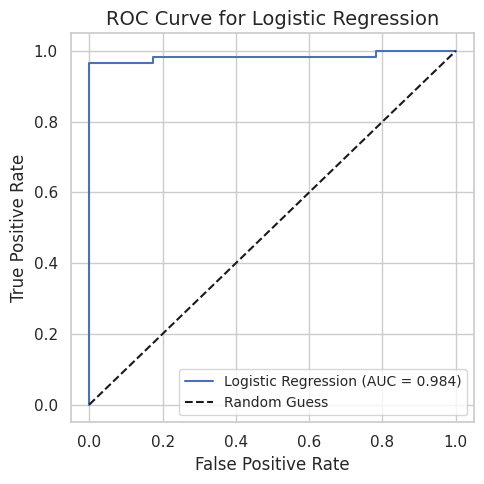

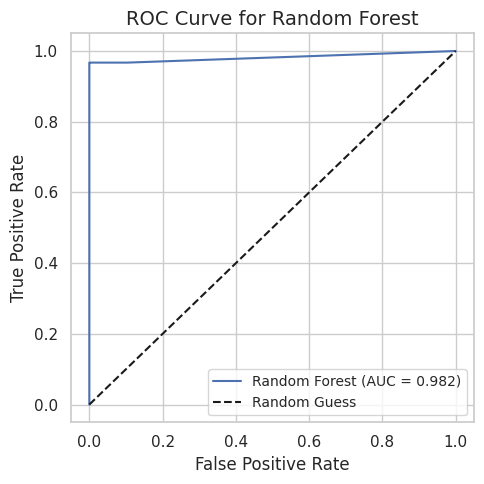

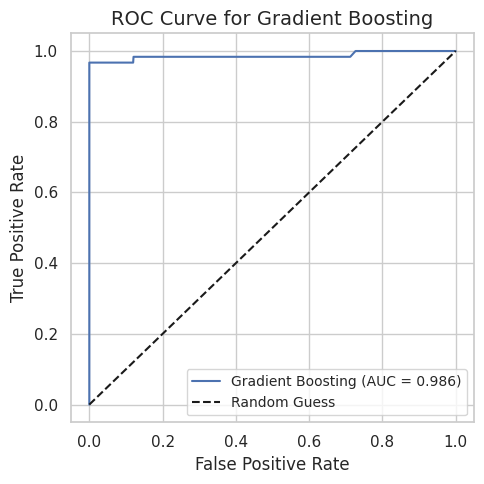

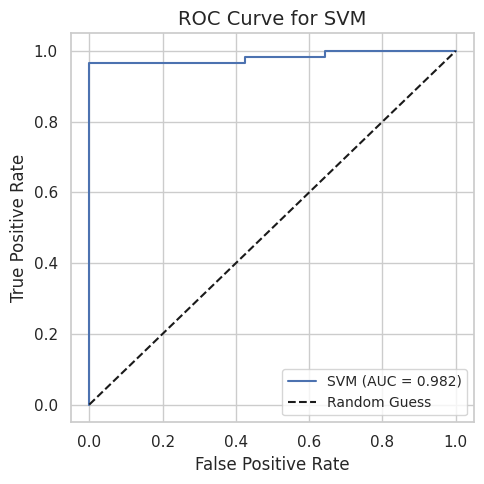

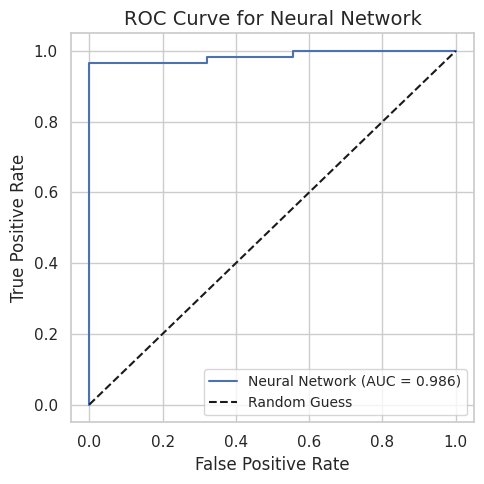

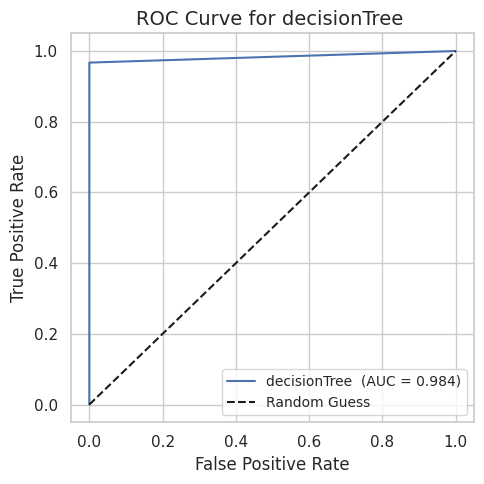

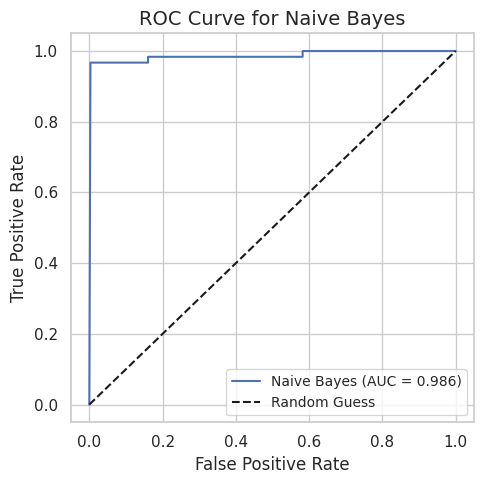

In [19]:
# Visualize ROC Curves (Separate plots for each model)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

sns.set(style="whitegrid")

for name, model in models.items():
    plt.figure(figsize=(5,5))
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for the model
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")
    plt.plot([0, 1], [0, 1], "k--", label="Random Guess")

    # Add labels and legend
    plt.title(f"ROC Curve for {name}", fontsize=14)
    plt.xlabel("False Positive Rate", fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=12)
    plt.legend(loc="lower right", fontsize=10)
    plt.tight_layout()
    plt.show()

In [ ]:
report_rows = []
for name, result in results.items():
    row = {
        "Model": name,
        "Precision": result["Classification Report"]["weighted avg"]["precision"],
        "Recall": result["Classification Report"]["weighted avg"]["recall"],
        "F1-Score": result["Classification Report"]["weighted avg"]["f1-score"],
        "ROC AUC": result["ROC AUC"]
    }
    report_rows.append(row)

# Create a DataFrame for better visualization
report_df = pd.DataFrame(report_rows)
print("\nClassification Report Summary:")
report_df


Classification Report Summary:


,Model,Precision,Recall,F1-Score,ROC AUC
0,Logistic Regression,0.999001,0.9990,0.998992,0.984317
1,Random Forest,0.999001,0.9990,0.998992,0.981890
2,Gradient Boosting,0.998492,0.9985,0.998494,0.986236
3,SVM,0.999001,0.9990,0.998992,0.982499
4,Neural Network,0.999001,0.9990,0.998992,0.985610
5,decisionTree,0.999001,0.9990,0.998992,0.983607
6,Naive Bayes,0.996183,0.9960,0.996061,0.986329


In [ ]:
# Identify the best model based on ROC AUC and F1-Score
best_model_auc = report_df.loc[report_df['ROC AUC'].idxmax()]
print("\nBest Model Based on ROC AUC:\n")
best_model_auc





Best Model Based on ROC AUC:



Model        Naive Bayes
Precision       0.996183
Recall             0.996
F1-Score        0.996061
ROC AUC         0.986329
Name: 6, dtype: object

# Model Deployment

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn import set_config
set_config(display='diagram')

In [ ]:
transformer = ColumnTransformer(transformers=[
    ('tnf1', OrdinalEncoder(),[0]),
    ('tnf2',StandardScaler(),[1,2,3,4,5,6,7,8,9,10])
], remainder='passthrough')

In [ ]:
model = Pipeline(steps=[('transformer', transformer),('model',GaussianNB(priors=[0.3, 0.7], var_smoothing=1e-8))])

In [ ]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('tnf1', OrdinalEncoder(), [0]),
                                ('tnf2', StandardScaler(),
                                 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])])

In [ ]:
model

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1', OrdinalEncoder(),
                                                  [0]),
                                                 ('tnf2', StandardScaler(),
                                                  [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10])])),
                ('model', GaussianNB(priors=[0.3, 0.7], var_smoothing=1e-08))])

In [ ]:
features = original_data.drop(columns=[ "Machine failure"])
target = original_data["Machine failure"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1', OrdinalEncoder(),
                                                  [0]),
                                                 ('tnf2', StandardScaler(),
                                                  [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10])])),
                ('model', GaussianNB(priors=[0.3, 0.7], var_smoothing=1e-08))])

In [ ]:
import pickle

pickle.dump(model, open('pm_final_model9.pkl','wb'))